In [1]:
%display latex

In [47]:
W0(x) = lambert_w(x/RDF(e)) + 1 

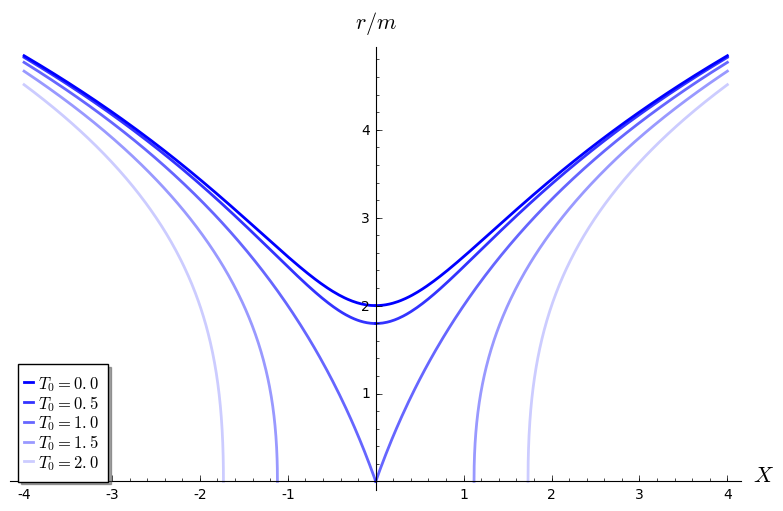

In [93]:
T0_list = [0., 0.5, 1., 1.5, 2.0001]
g = Graphics()
for T0 in T0_list:
    Xmin = sqrt(max(0, T0^2-1))
    alp = 0.2 + 0.4*(2. - T0)
    g += plot(2*W0(x^2-T0^2), (x,-4,-Xmin), thickness=2, color='blue', alpha=alp,
              legend_label="$T_0={:02.1f}$".format(float(T0))) + \
         plot(2*W0(x^2-T0^2), (x, Xmin, 4), thickness=2, color='blue', alpha=alp)
show(g, aspect_ratio=1, axes_labels=[r'$X$', r'$r/m$'])

In [92]:
g.save("max_SigmaT0_r_X.pdf", aspect_ratio=1, axes_labels=[r'$X$', r'$r/m$'])

In [2]:
var('r T', domain='real')

(r, T)

In [3]:
zp(r,T) = sqrt((1-T^2*e^(-r/2))/(r/2-1+T^2*e^(-r/2)))
zp

(r, T) |--> sqrt(2)*sqrt(-(T^2*e^(-1/2*r) - 1)/(2*T^2*e^(-1/2*r) + r - 2))

In [4]:
z = integrate(zp(r,T), r)
z

sqrt(2)*integrate(sqrt(-(T^2*e^(-1/2*r) - 1)/(2*T^2*e^(-1/2*r) + r - 2)), r)

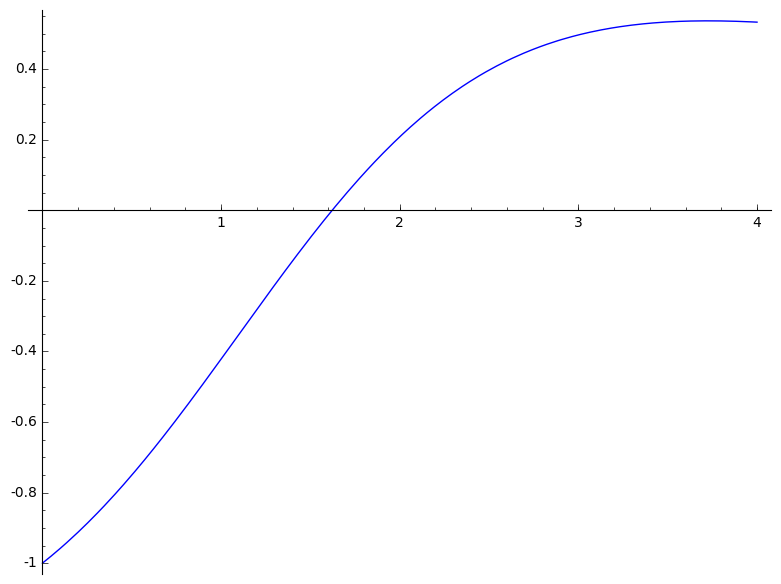

In [5]:
T0=3/2
plot((1-T0^2*e^(-r/2))/(r/2-1+T0^2*e^(-r/2)), (r,0,4))

In [48]:
def rmin(T):
    if T > 1:
        return RDF(4*ln(T))
    return 2*W0(-T^2)

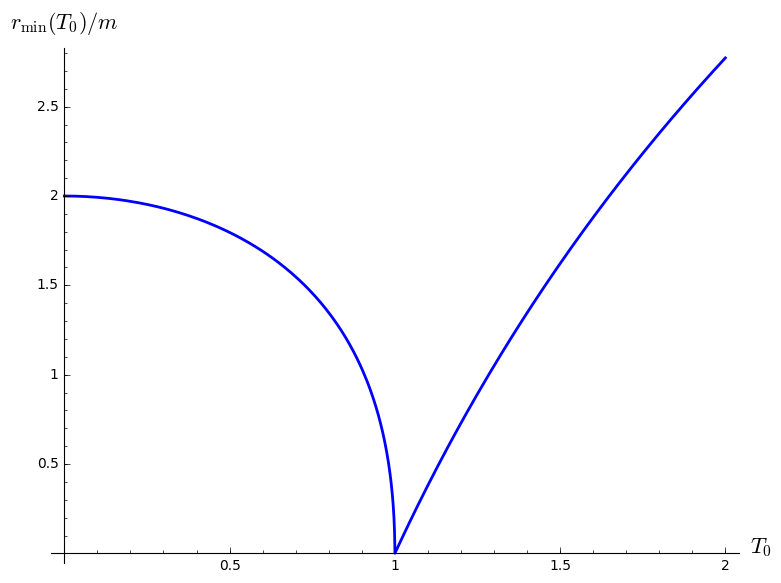

In [49]:
plot(rmin, (T,0,2), axes_labels=[r'$T_0$', r'$r_{\rm min}(T_0)/m$'], thickness=2)

In [8]:
rmin(1/2), rmin(3/2)

(1.796343137811716, 1.6218604324326575)

In [9]:
def zz(r1, T0):
    dzdr = zp(r, T0)
    numint = numerical_integral(dzdr, rmin(T0), r1, algorithm='qags')
    error = numint[1]
    if error > 1e-3: 
        print("Warning: error = {}".format(error))
    if T0 > 1:
        return numint[0] + 1
    return numint[0]

In [10]:
zz(4, 1/2)

4.226847171416433

In [11]:
zz(4, 3/2)

2.4583755881988343

In [12]:
T0_list = [0, 0.98, 0.99, 0.999, 1, 1.1, 1.5, 2]
g = Graphics()
for T0 in T0_list:
    g += plot(lambda r: zz(r, T0), rmin(T0), 20)

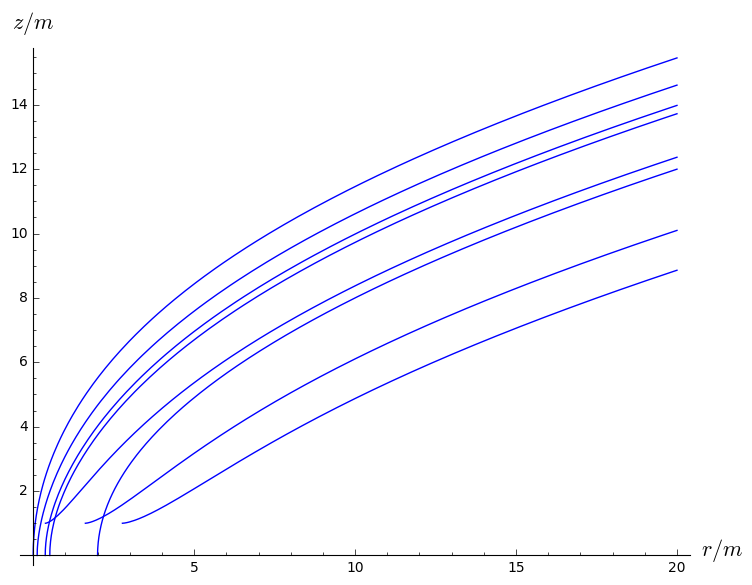

In [13]:
show(g, aspect_ratio=1, xmin=0, xmax=20, axes_labels=[r'$r/m$', r'$z/m$'])

In [14]:
var('ph', latex_name=r'\phi', domain='real')

ph

In [15]:
from sage.manifolds.utilities import set_axes_labels

In [16]:
T0 = 0
g1 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='wheat')
g2 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: -zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='wheat')
g = set_axes_labels(g1 + g2, 'x', 'y', 'z')
show(g, aspect_ratio=1)

Graphics3d Object

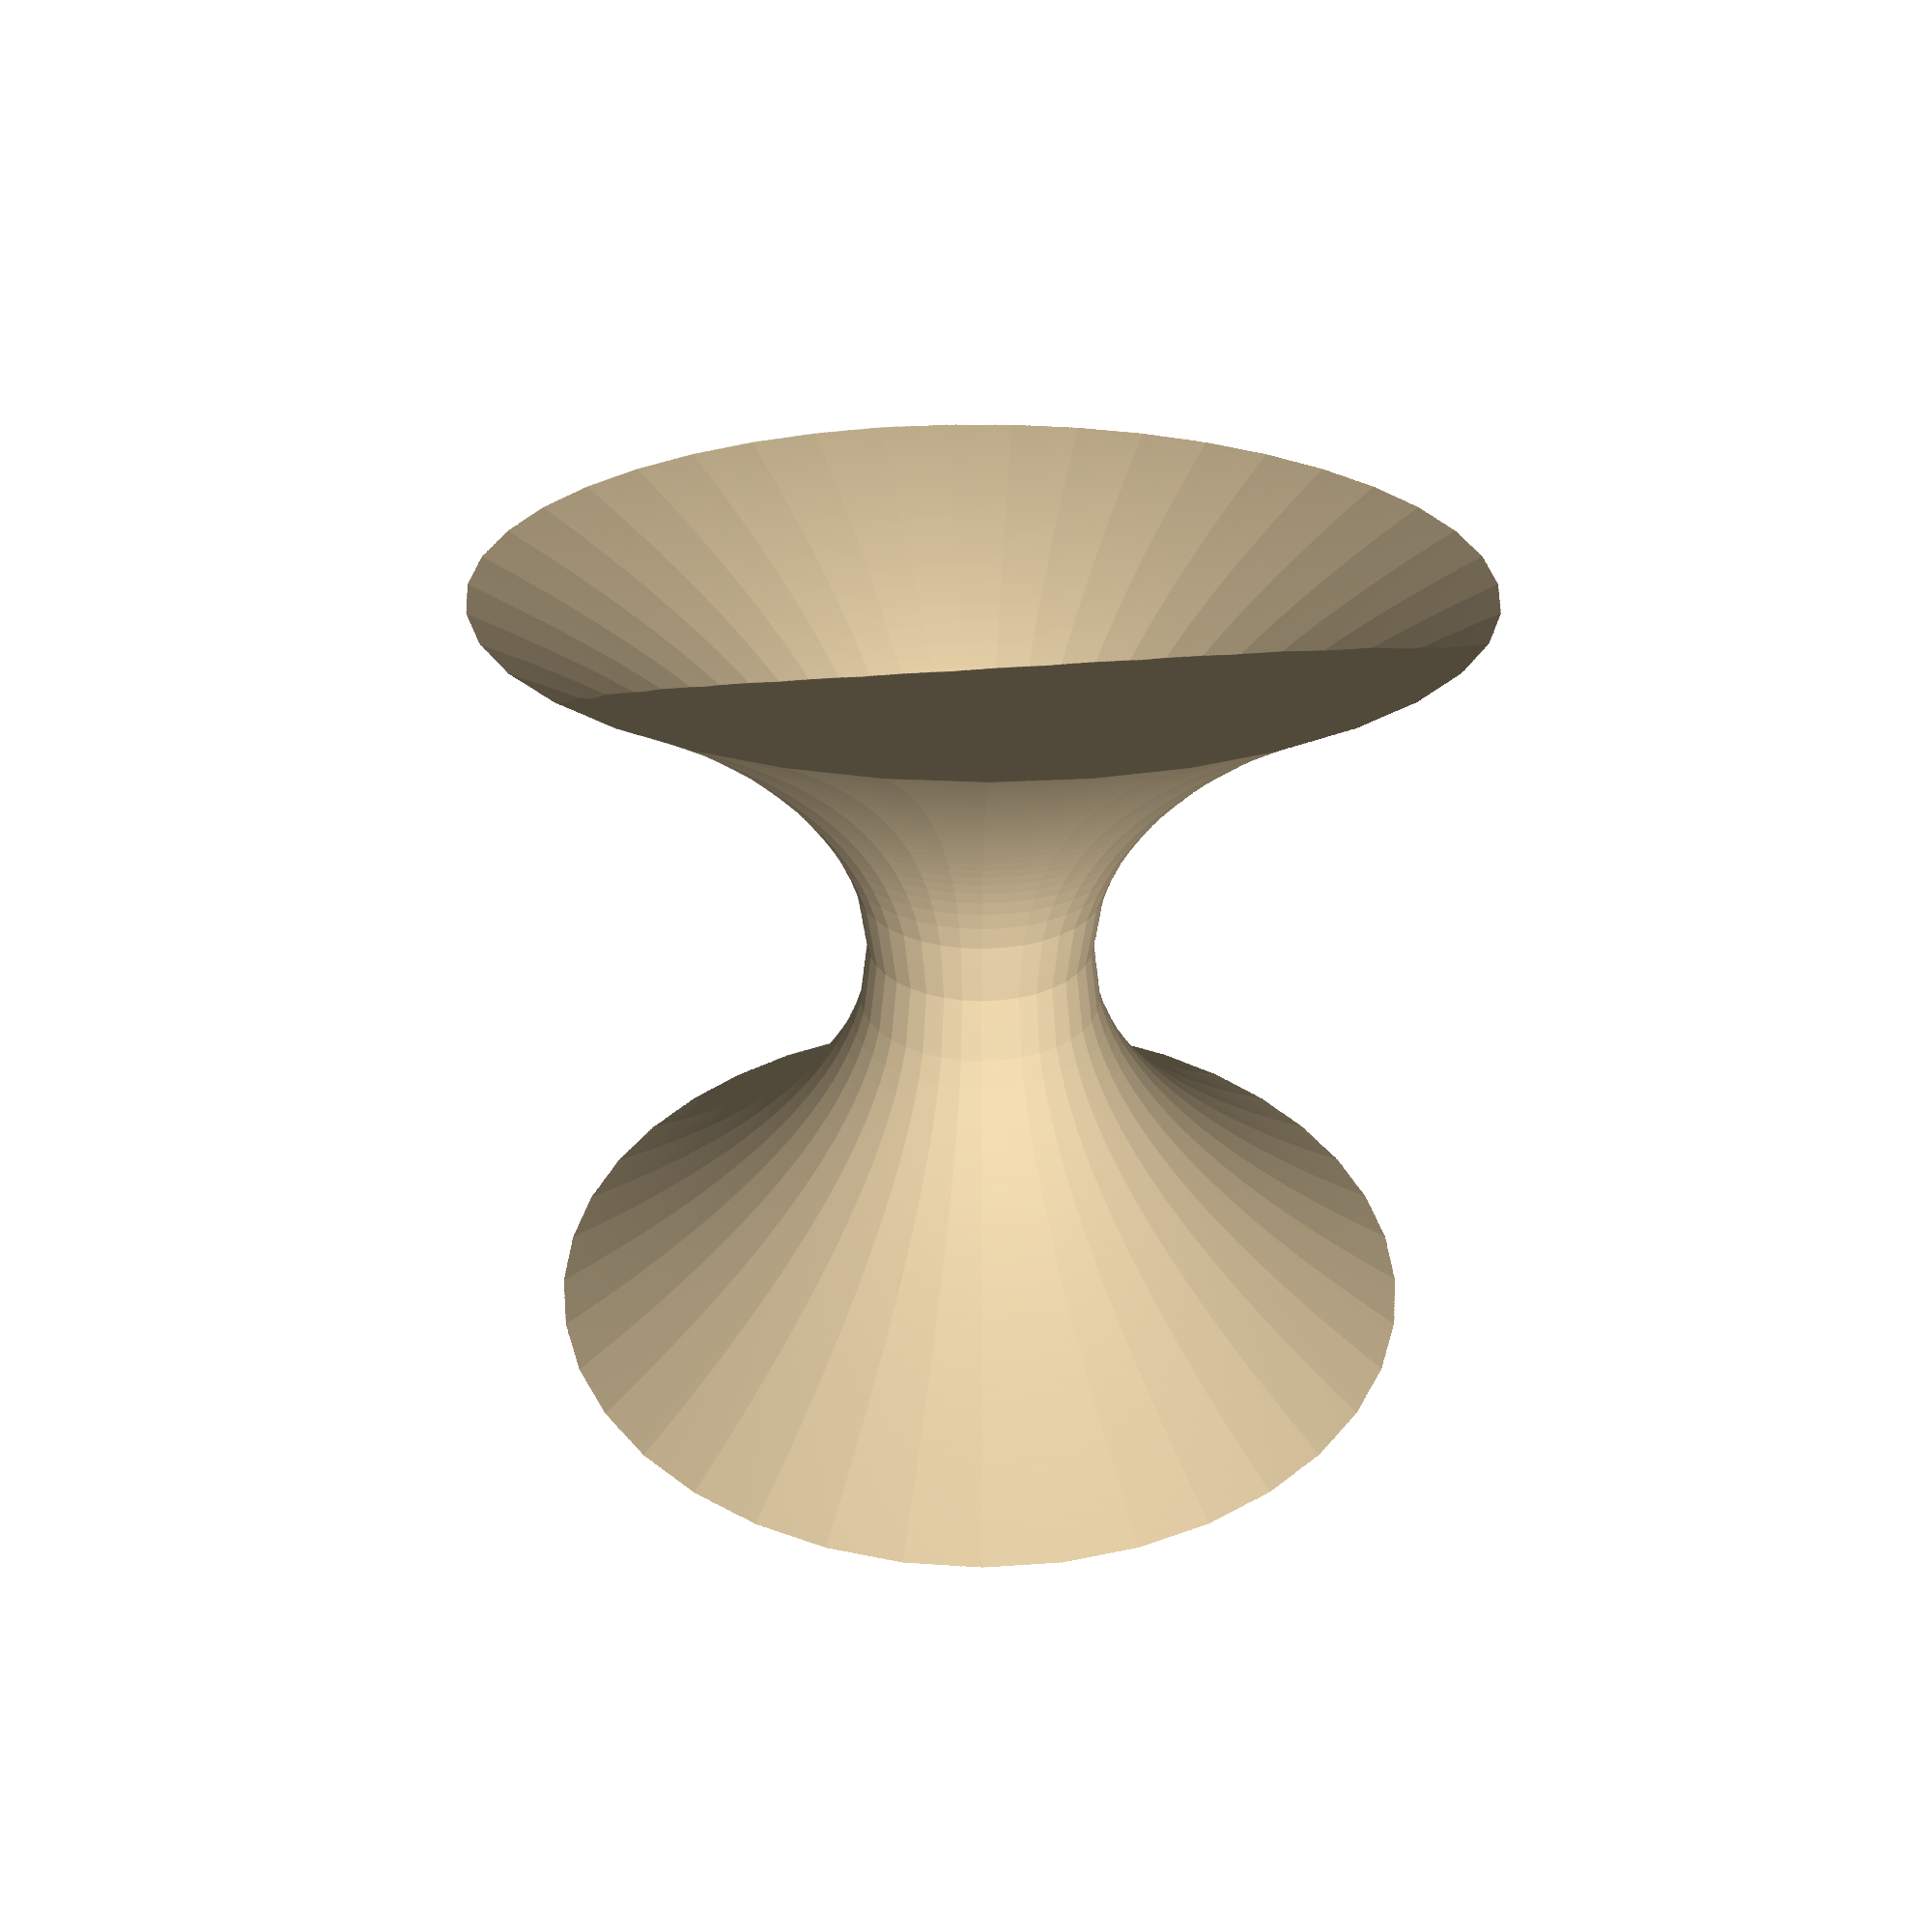

In [17]:
show(g, aspect_ratio=1, viewer='tachyon', frame=False, figsize=20)

In [18]:
g.save('max_flamm_paraboloid.png', aspect_ratio=1)

In [19]:
T0 = 1
g1 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='wheat')
g2 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: -zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='wheat')
g = set_axes_labels(g1 + g2, 'x', 'y', 'z')
show(g, aspect_ratio=1)

Graphics3d Object

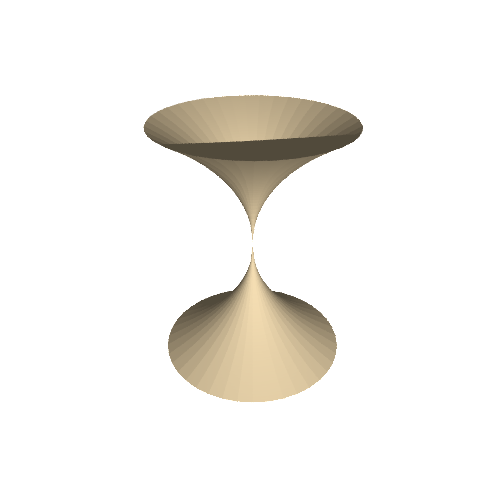

In [20]:
show(g, aspect_ratio=1, viewer='tachyon', frame=False)

In [21]:
T0 = 1.5
g1 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='wheat')
g2 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: -zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='wheat')
g = set_axes_labels(g1 + g2, 'x', 'y', 'z')
show(g, aspect_ratio=1)

Graphics3d Object

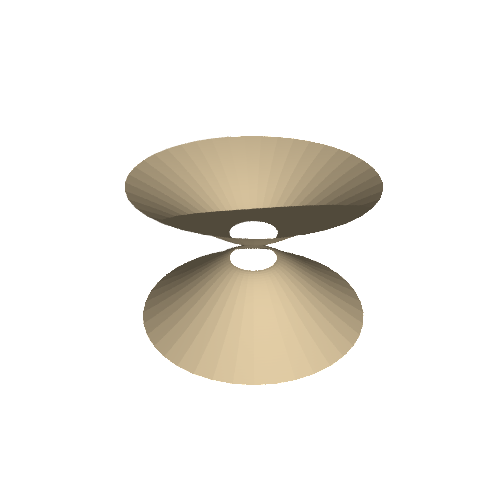

In [22]:
show(g, aspect_ratio=1, viewer='tachyon', frame=False)

In [23]:
T0 = 3
g1 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='wheat')
g2 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: -zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='wheat')
g = set_axes_labels(g1 + g2, 'x', 'y', 'z')
show(g, aspect_ratio=1)

Graphics3d Object

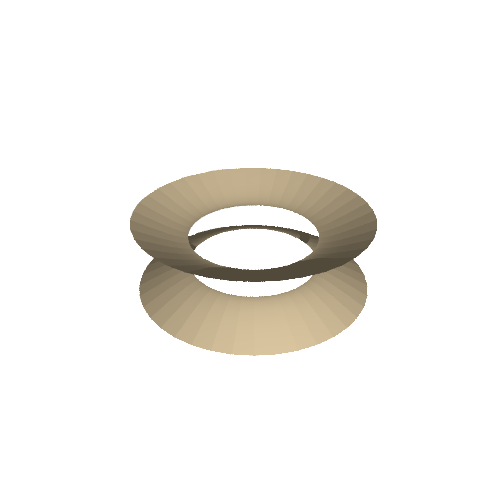

In [24]:
show(g, aspect_ratio=1, viewer='tachyon', frame=False)

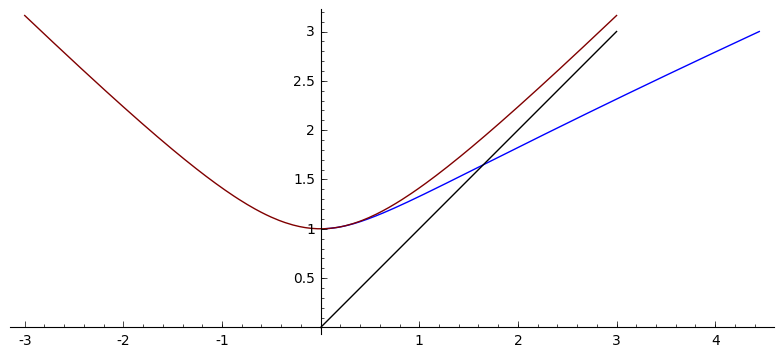

In [34]:
g = parametric_plot([T*sqrt(2*ln(T)), T], (T, 1.001, 3)) + \
    plot(sqrt(1+x^2), (x,-3,3), color='maroon') + \
    line([(0,0), (3,3)], color='black')
show(g, aspect_ratio=1, ymin=0)